In [37]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('ParisHousing.csv')

In [39]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [40]:
d=df.drop(['hasYard','hasPool','isNewBuilt','hasStormProtector','hasStorageRoom','made'], axis=1)
X=d.drop(['price'],axis=1)
y=d.price

In [41]:
from sklearn.model_selection import train_test_split # type: ignore
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=55)
print(X_train.shape,Y_train.shape)
X_train.describe()

(7500, 10) (7500,)


,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,basement,attic,garage,hasGuestRoom
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,49841.575467,50.139333,50.181467,49960.322267,5.488400,5.509067,5045.179333,5049.777733,553.128133,5.010267
std,28840.233948,28.852253,28.940047,29045.606690,2.883246,2.845499,2865.115121,2907.138692,261.099078,3.171504
min,89.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,100.000000,0.000000
25%,25075.000000,25.000000,25.000000,24493.500000,3.000000,3.000000,2568.750000,2511.000000,329.000000,2.000000
50%,50116.000000,50.000000,50.000000,50372.000000,5.000000,5.000000,5106.500000,5095.000000,554.000000,5.000000
75%,74896.500000,75.000000,76.000000,75424.000000,8.000000,8.000000,7513.500000,7586.000000,777.000000,8.000000
max,99985.000000,100.000000,100.000000,99953.000000,10.000000,10.000000,10000.000000,10000.000000,1000.000000,10.000000


In [42]:
trainModel=X_train.join(Y_train)
trainModel.corr()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,basement,attic,garage,hasGuestRoom,price
squareMeters,1.000000,0.010784,-0.015689,-0.005129,0.004767,0.019231,0.006878,-0.001093,-0.004707,-0.002974,0.999999
numberOfRooms,0.010784,1.000000,0.023304,0.013927,0.005214,0.011895,-0.006593,0.003166,0.024942,-0.016980,0.010803
floors,-0.015689,0.023304,1.000000,-0.000897,-0.011338,0.001265,0.008200,-0.006242,0.019994,-0.014523,-0.015149
cityCode,-0.005129,0.013927,-0.000897,1.000000,0.016274,0.001649,-0.001117,0.000953,0.004213,-0.003525,-0.005128
cityPartRange,0.004767,0.005214,-0.011338,0.016274,1.000000,-0.000532,-0.001060,0.008220,-0.001553,0.000954,0.004822
numPrevOwners,0.019231,0.011895,0.001265,0.001649,-0.000532,1.000000,0.002264,-0.010513,0.018267,-0.006135,0.019213
basement,0.006878,-0.006593,0.008200,-0.001117,-0.001060,0.002264,1.000000,-0.005994,0.014272,-0.020360,0.006883
attic,-0.001093,0.003166,-0.006242,0.000953,0.008220,-0.010513,-0.005994,1.000000,-0.004338,-0.012512,-0.001110
garage,-0.004707,0.024942,0.019994,0.004213,-0.001553,0.018267,0.014272,-0.004338,1.000000,-0.009525,-0.004688
hasGuestRoom,-0.002974,-0.016980,-0.014523,-0.003525,0.000954,-0.006135,-0.020360,-0.012512,-0.009525,1.000000,-0.002992


array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'numberOfRooms'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'cityCode'}>,
        <Axes: title={'center': 'cityPartRange'}>,
        <Axes: title={'center': 'numPrevOwners'}>],
       [<Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'attic'}>,
        <Axes: title={'center': 'garage'}>],
       [<Axes: title={'center': 'hasGuestRoom'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

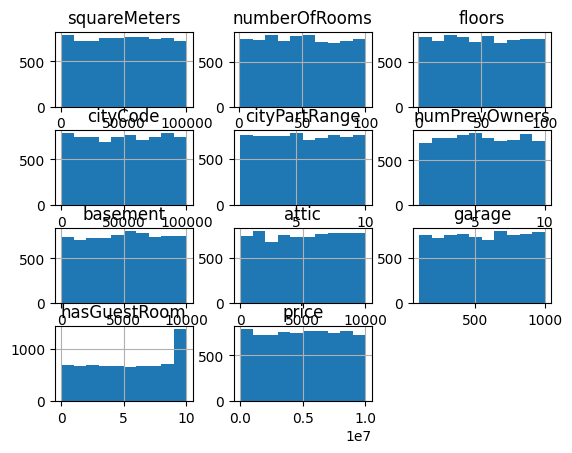

In [43]:
trainModel.hist()

In [44]:
from sklearn import linear_model # type: ignore
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [45]:
model.coef_

array([ 9.99999171e+01,  5.03048977e-01,  5.38267324e+01,  1.05266264e-04,
        6.16700298e+01, -1.94850758e+01,  3.14413377e-04, -1.39906368e-02,
        9.62629248e-02, -9.00467927e+00])

In [46]:
model.intercept_

3533.6583263184875

In [47]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [48]:
Model_Test=pd.DataFrame(X_test)
Model_Test['Test Actual Outcome']=Y_test
Model_Test['Test Predicted Outcome']=y_pred_test
Model_Test['Test Predicted Outcome']=Model_Test['Test Predicted Outcome'].astype('int64')
Model_Test['Test Actual Outcome']=Model_Test['Test Actual Outcome'].astype('int64')
Model_Test

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,basement,attic,garage,hasGuestRoom,Test Actual Outcome,Test Predicted Outcome
2082,68365,96,79,31033,5,7,8246,4070,636,6,6846772,6844456
679,49063,35,81,53623,1,5,9416,7968,972,7,4909260,4914099
2751,97452,83,54,29279,10,1,9092,321,419,7,9751753,9752249
3295,27451,80,20,32205,4,3,934,3608,354,9,2747145,2749842
5392,21857,93,16,35864,6,4,8040,8580,147,5,2191307,2190287
...,...,...,...,...,...,...,...,...,...,...,...,...
6129,82311,85,98,52171,8,4,9962,6386,164,0,8239353,8240295
8735,30042,84,65,38907,6,7,1586,4054,142,2,3008534,3011449
2828,46910,80,99,32102,7,6,4093,3721,890,8,4706368,4700179
7718,97365,90,74,59928,4,10,9302,4806,491,0,9738114,9744095


In [49]:
from sklearn.metrics import r2_score # type: ignore
r2_score(Y_test,y_pred_test)

0.9999989683130118

In [50]:
r2_score(Y_train,y_pred_train)

0.9999990294452938

In [51]:
import pickle

In [52]:
with open ('HousePrdictionParis.pkl','wb') as file:
    pickle.dump(model,file)